In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('insurance_dataset(data3).csv')

In [3]:
data.describe()

,Age,Health_Status,Smoker,Lifestyle,BMI,Chronic_Conditions,Family_History,Annual_Income,Region,Num_Dependents,Previous_Claims,Exercise_Frequency,Cholesterol_Level,Daily_Avg_Steps,Alcohol,Fat_Percentage,Insurance_Premium
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,43.703000,2.516000,0.493000,1.956000,26.690437,0.524000,0.479000,84655.433475,1.979000,2.589000,0.508000,2.025000,1.512000,8250.016000,30.012694,0.250193,3347.715679
std,15.419876,1.120267,0.500201,0.820205,4.943427,0.499674,0.499809,36809.780755,0.814385,1.702051,0.500186,0.825261,0.500106,3998.908596,16.939729,0.086850,559.057329
min,18.000000,1.000000,0.000000,1.000000,18.008184,0.000000,0.000000,20139.657164,1.000000,0.000000,0.000000,1.000000,1.000000,1035.000000,0.057014,0.100042,1538.602012
25%,30.000000,1.750000,0.000000,1.000000,22.458285,0.000000,0.000000,52550.052637,1.000000,1.000000,0.000000,1.000000,1.000000,4761.500000,15.846028,0.176104,2962.714409
50%,44.000000,3.000000,0.000000,2.000000,26.858508,1.000000,0.000000,85770.931293,2.000000,3.000000,1.000000,2.000000,2.000000,8488.000000,29.915199,0.249973,3357.318218
75%,58.000000,4.000000,1.000000,3.000000,31.028636,1.000000,1.000000,115620.424154,3.000000,4.000000,1.000000,3.000000,2.000000,11712.250000,43.828531,0.324704,3747.359247
max,70.000000,4.000000,1.000000,3.000000,34.999354,1.000000,1.000000,149919.374605,3.000000,5.000000,1.000000,3.000000,2.000000,14994.000000,59.986528,0.399537,4976.643199


In [4]:
data.head()

,Age,Health_Status,Smoker,Lifestyle,BMI,Chronic_Conditions,Family_History,Annual_Income,Region,Num_Dependents,Previous_Claims,Exercise_Frequency,Cholesterol_Level,Daily_Avg_Steps,Alcohol,Fat_Percentage,Insurance_Premium
0,49,4,1,2,23.115614,0,0,29102.901935,3,4,1,1,1,6168,35.892970,0.258010,3280.408877
1,54,3,0,1,20.521669,0,1,33559.962202,3,3,1,3,1,4419,39.560400,0.201797,3318.220772
2,47,3,0,2,18.271118,1,0,102450.388151,1,0,0,3,2,5206,44.565065,0.383701,2729.410538
3,50,2,1,2,21.433131,1,0,94200.366188,1,1,0,1,1,3350,56.165721,0.267158,3550.189868
4,61,1,0,1,19.841419,1,0,108385.419153,1,4,0,1,2,7790,35.972655,0.135012,3012.686978


# 1 . Preprocessing

In [5]:
#Checking NULl Values

from sklearn.impute import SimpleImputer
data.isnull().sum()

Age                   0
Health_Status         0
Smoker                0
Lifestyle             0
BMI                   0
Chronic_Conditions    0
Family_History        0
Annual_Income         0
Region                0
Num_Dependents        0
Previous_Claims       0
Exercise_Frequency    0
Cholesterol_Level     0
Daily_Avg_Steps       0
Alcohol               0
Fat_Percentage        0
Insurance_Premium     0
dtype: int64

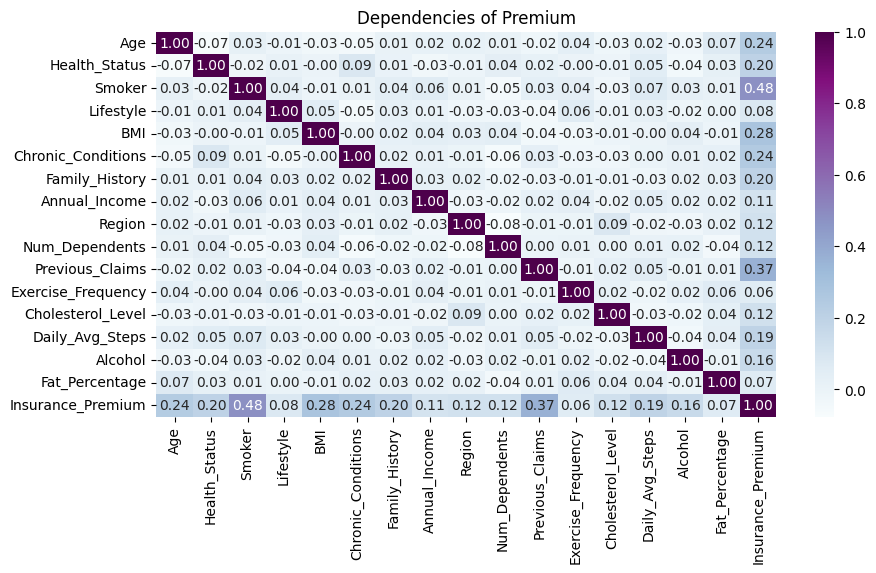

In [6]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Premium")
plt.show()

### Premium is Dependent on these : 
### ['Age', 'Health_Status','Smoker','BMI','Chronic_Conditions'
### ,'Family_History','Previous_Claims','Daily_Avg_Steps'
### ,'Alcohol']

C:\Users\Kinshuk\AppData\Local\Temp\ipykernel_15432\2019521244.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 5, i + 1)


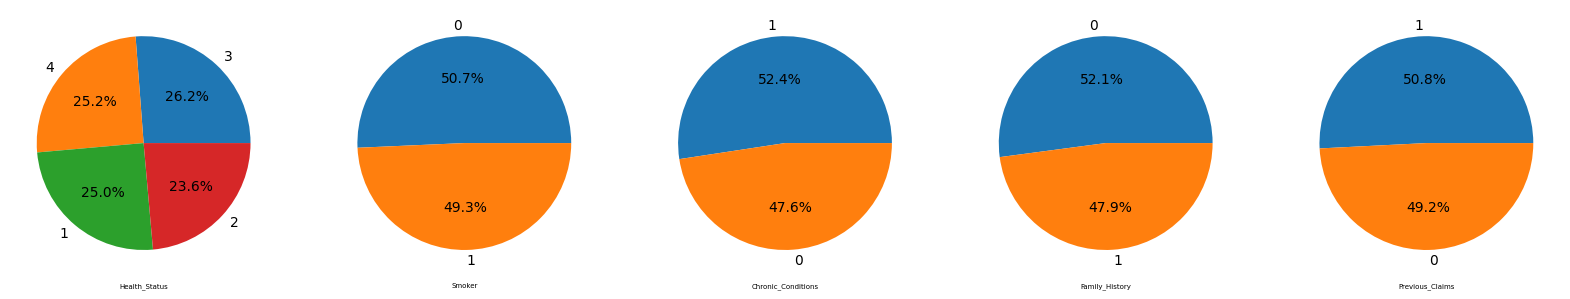

In [7]:
#Checking Imbalanced data
features = ['Health_Status','Smoker','Chronic_Conditions','Family_History','Previous_Claims']
  
plt.subplots(figsize=(20, 20))
for i, col in enumerate(features):
    plt.subplot(1, 5, i + 1)
  
    x = data[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')
    plt.xlabel(col,fontsize = 5)
  
plt.show()

C:\Users\Kinshuk\AppData\Local\Temp\ipykernel_15432\374471358.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i + 1)


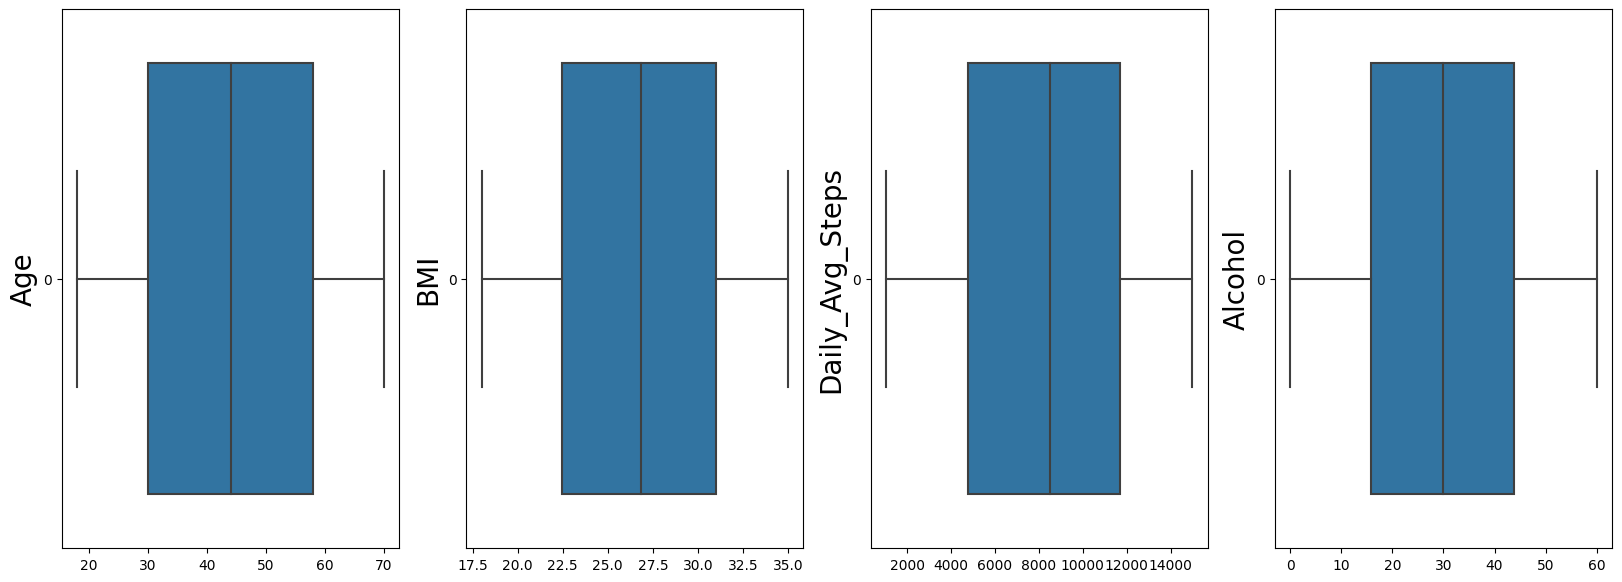

In [8]:
features = ['Age','BMI','Daily_Avg_Steps','Alcohol']
  
plt.subplots(figsize=(20, 7))
for i, col in enumerate(features):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(data[col], orient="h")
    plt.ylabel(col,fontsize = 20)
plt.show()

### 3. Analysis and plotting data

C:\Users\Kinshuk\AppData\Local\Temp\ipykernel_15432\308096978.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, i + 1)                       # 3rows having 3 graphs each


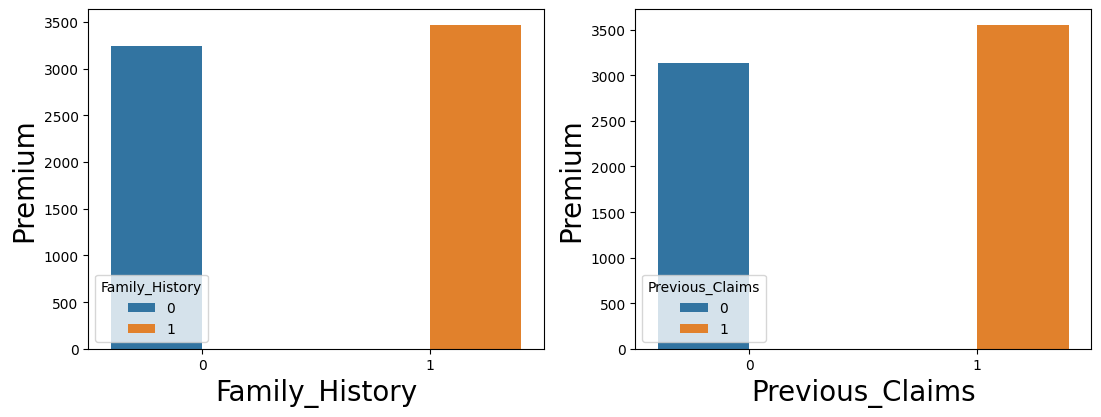

In [9]:
features = ['Family_History','Previous_Claims']
  
plt.subplots(figsize=(20, 15))
for i, col in enumerate(features):
    plt.subplot(3, 3, i + 1)                       # 3rows having 3 graphs each
    sns.barplot(data=data,x=col,y='Insurance_Premium',hue=col,errorbar=('ci',0),width=0.8)
    plt.xlabel(col,fontsize = 20)
    plt.ylabel('Premium',fontsize = 20)
plt.show()

### Removing data that have min contribution in predicting Premium

In [10]:
features = ['Lifestyle','Annual_Income','Num_Dependents','Exercise_Frequency','Cholesterol_Level','Fat_Percentage']

for i in features:
    data.drop(i,axis=1,inplace=True)

In [11]:
data

,Age,Health_Status,Smoker,BMI,Chronic_Conditions,Family_History,Region,Previous_Claims,Daily_Avg_Steps,Alcohol,Insurance_Premium
0,49,4,1,23.115614,0,0,3,1,6168,35.892970,3280.408877
1,54,3,0,20.521669,0,1,3,1,4419,39.560400,3318.220772
2,47,3,0,18.271118,1,0,1,0,5206,44.565065,2729.410538
3,50,2,1,21.433131,1,0,1,0,3350,56.165721,3550.189868
4,61,1,0,19.841419,1,0,1,0,7790,35.972655,3012.686978
...,...,...,...,...,...,...,...,...,...,...,...
995,18,3,0,20.729232,0,0,3,0,8681,4.581642,2595.299189
996,21,1,1,20.001867,0,0,1,0,7886,18.694716,2639.879540
997,32,4,0,34.303722,1,1,2,1,10948,12.698147,3567.530817
998,45,4,1,19.666824,1,0,2,0,11915,14.240401,3723.222963


### 4. Splitting test train data

In [12]:
y = data['Insurance_Premium'].copy()
x = data.drop('Insurance_Premium',axis=1)

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42) 


### 5. Training the models


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [15]:
lr=LinearRegression()
model1 = lr.fit(X_train,y_train)

y_pred1 = model1.predict(X_test)

#### Checking errors

In [16]:
error = []
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
import numpy as np

#MAE
mae = mean_absolute_error(y_test,y_pred1)
error.append(mae)

#MAPE
mape = mean_absolute_percentage_error(y_test,y_pred1)
error.append(mape)

#r2
rs = r2_score(y_test,y_pred1)
error.append(rs)

err = pd.DataFrame(error).T
err.columns=['MAE','MAPE','R2']
err

,MAE,MAPE,R2
0,262.01875,0.081973,0.670996


In [17]:
X_train.shape

(670, 10)

In [19]:
adR2 = 1- ( ((1-rs) * (670-1)) / (670-1-10))
adR2

0.666003994707276

In [20]:
## For train
pred1_tr = model1.predict(X_train)

error = []
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
import numpy as np

#MAE
mae = mean_absolute_error(y_train,pred1_tr)
error.append(mae)

#MAPE
mape = mean_absolute_percentage_error(y_train,pred1_tr)
error.append(mape)

#r2
rs = r2_score(y_train,pred1_tr)
error.append(rs)

err = pd.DataFrame(error).T
err.columns=['MAE','MAPE','R2']
err

,MAE,MAPE,R2
0,265.4697,0.081722,0.685201


In [21]:
adR2 = 1- ( ((1-rs) * (670-1)) / (670-1-10))
adR2

0.6804244019719313

##### b) Random Forest

In [22]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state = 0)
model2 = regressor.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

In [23]:
error2 = []
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
import numpy as np

#MAE
mae = mean_absolute_error(y_test,y_pred2)
error2.append(mae)

#MAPE
mape = mean_absolute_percentage_error(y_test,y_pred2)
error2.append(mape)

#r2
rs = r2_score(y_test,y_pred2)
error2.append(rs)


err2 = pd.DataFrame(error2).T
err2.columns=['MAE','MAPE','R2']
err2

,MAE,MAPE,R2
0,291.161289,0.091834,0.565945


In [24]:
adR2 = 1- ( ((1-rs) * (670-1)) / (670-1-10))
adR2

0.5593583409915044

In [25]:
## For train
pred2_tr = model2.predict(X_train)

error = []
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
import numpy as np

#MAE
mae = mean_absolute_error(y_train,pred2_tr)
error.append(mae)

#MAPE
mape = mean_absolute_percentage_error(y_train,pred2_tr)
error.append(mape)

#r2
rs = r2_score(y_train,pred2_tr)
error.append(rs)

err = pd.DataFrame(error).T
err.columns=['MAE','MAPE','R2']
err

,MAE,MAPE,R2
0,111.973194,0.03501,0.940078


In [26]:
adR2 = 1- ( ((1-rs) * (670-1)) / (670-1-10))
adR2

0.939169153998863

### Decision Tree


In [27]:
from sklearn.tree import DecisionTreeRegressor  
dt = DecisionTreeRegressor(random_state = 0)  
model3 = dt.fit(X_train, y_train) 

predTree = model3.predict(X_test)

In [28]:
error3 = []
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
import numpy as np
#MAE
mae = mean_absolute_error(y_test,predTree)
error3.append(mae)

#MAPE
mape = mean_absolute_percentage_error(y_test,predTree)
error3.append(mape)

#r2
rs = r2_score(y_test,predTree)
error3.append(rs)


err3 = pd.DataFrame(error3).T
err3.columns=['MAE','MAPE','R2']
err3

,MAE,MAPE,R2
0,414.452812,0.128256,0.106351


In [29]:
adR2 = 1- ( ((1-rs) * (670-1)) / (670-1-10))
adR2

0.092790568612233

In [30]:
## For train
pred3_tr = model3.predict(X_train)

error = []
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
import numpy as np

#MAE
mae = mean_absolute_error(y_train,pred3_tr)
error.append(mae)

#MAPE
mape = mean_absolute_percentage_error(y_train,pred3_tr)
error.append(mape)

#r2
rs = r2_score(y_train,pred3_tr)
error.append(rs)

err = pd.DataFrame(error).T
err.columns=['MAE','MAPE','R2']
err

,MAE,MAPE,R2
0,0.0,0.0,1.0


In [31]:
adR2 = 1- ( ((1-rs) * (670-1)) / (670-1-10))
adR2

1.0

## gradient boosting


In [32]:
from sklearn.ensemble import GradientBoostingRegressor 

gb = GradientBoostingRegressor()
model4 = gb.fit(X_train, y_train)
predGb = model4.predict(X_test)

In [33]:
error4 = []
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
import numpy as np
#MAE
mae = mean_absolute_error(y_test,predGb)
error4.append(mae)

#MAPE
mape = mean_absolute_percentage_error(y_test,predGb)
error4.append(mape)

#r2
rs = r2_score(y_test,predGb)
error4.append(rs)


err3 = pd.DataFrame(error4).T
err3.columns=['MAE','MAPE','R2']
err3

,MAE,MAPE,R2
0,278.376928,0.087138,0.612336


In [34]:
adR2 = 1- ( ((1-rs) * (670-1)) / (670-1-10))
adR2

0.6064533077759793

In [35]:
## For train
pred4_tr = model4.predict(X_train)

error = []
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
import numpy as np

#MAE
mae = mean_absolute_error(y_train,pred4_tr)
error.append(mae)

#MAPE
mape = mean_absolute_percentage_error(y_train,pred4_tr)
error.append(mape)

#r2
rs = r2_score(y_train,pred4_tr)
error.append(rs)

err = pd.DataFrame(error).T
err.columns=['MAE','MAPE','R2']
err

,MAE,MAPE,R2
0,189.046148,0.058336,0.830461


In [36]:
adR2 = 1- ( ((1-rs) * (670-1)) / (670-1-10))
adR2

0.827888777412365